# Control Flow and Functions

## Control flow statements

Control flow statements control the order of execution of different pieces of code. They can be used to do things like make sure code is only run when certain conditions are met, to iterate through data structures, to repeat something until a specified event happens, etc. Control flow statements are frequently used when writing functions or carrying out complex data transformation.

### `if`, `if-else`, and `if-elif-else` statements

if and if-else blocks allow you to structure the flow of execution so that certain expressions are executed only if particular conditions are met.

In [218]:
import random 

x = random.random() # generate random number between 0 and 1
if x < 0.5:
    print("heads")
else:
    print("tails")


heads


`if` statements can be used by themselves, without a matching `else`:

In [219]:
x = random.randint(1,20) # generate random integer between 1 and 20 (inclusive)
if x == 20:
    print("Critical hit!")
# since there's no else statement nothing happens if x != 20

`elif` is used when there are multiple alternative possibilities.  The final `else`` matches any condition not specified in an if or elif statement:

In [220]:
 # random.choice returns a random element of the input sequence
x = random.choice(["A", "T", "G", "C", "N", "R", "Y", "S", "W", "K", "M", "."]) 
# see https://www.bioinformatics.org/sms/iupac.html for IUPAC nucleotide codes


if x == "A":
    base = "Adenine"
elif x == "T":
    base = "Thymine"
elif x == "G":
    base = "Guanine"
elif x == "C":
    base = "Cytosine"
elif x == ".":
    base = "gap"
else:
    base = "ambiguous nucleotide"
    
print(x, "represents", base)
    

N represents ambiguous nucleotide


### `match` and `case` expressions

Python version 3.10 introduced two new keywords called `match` and `case` that provide for "structural pattern" matching, which can be used in a manner to multiple if-elif-else statments (see https://docs.python.org/3/tutorial/controlflow.html#match-statements).

In [221]:
x = random.choice(["A", "T", "G", "C", "N", "R", "Y", "S", "W", "K", "M", "."]) 


match x:
    case "A": 
        base = "Adenine"
    case "T": 
        base = "Thymine"
    case "G": 
        base = "Guanine"
    case "C": 
        base = "Cytosine"
    case ".": 
        base = "gap"
    case _:  # default action
        base = "an ambiguous nucleotide"  


print(x, "represents", base)

G represents Guanine


Match / case statements allow for some syntax that makes them more appealing than if else statements. For example, you can match on multiple patterns in a single case statement using a vertical bar `|` to represents "or" logic.

In [222]:
x = random.choice(["A", "T", "G", "C", "N", "R", "Y", "S", "W", "K", "M", "."]) 

match x:
    case "A" | "G" | "R":
        nuctype = "purine"
    case "T" | "C" | "Y":
        nuctype = "pyrimidine" 
    case ".":
        nuctype = "gap (non base)"
    case _:
        nuctype = "ambiguous base"

print(f"{x} represents a {nuctype}")

N represents a ambiguous base


Pattern matching with match/case statements extends beyond literal matches. For example you can match on the structure of a match.

In [223]:
sentence = input("Enter a sentence: ")  # this will prompt you for input

match sentence.split():
    case []:
        print("You didn't enter any words at all.")
    case [word1]:
        print("Your sentence had one word!")
    case [word1, word2]:
        print("Your sentence had two words!")
    case _:
        print("Your sentence had more than two words!")

Your sentence had two words!


For more examples of match/case statements see the [Structural Matching tutorial](https://peps.python.org/pep-0636/#matching-sequences) from the "enhancement proposal" that was created when this new feature was proposed.

### `for` loops

A `for` statement iterates over the elements of a sequence (such as string or list). A common use of `for` statements is to carry out the same set of computations on each element of a sequence. 

In [224]:
words = ["how", "now", "brown", "cow"]
reversed_words = []

for word in words:
    reversed_words.append(word[::-1])

reversed_words

['woh', 'won', 'nworb', 'woc']

### Using `range()` in loops

If you want to explicitly iterate over integer values you can use the `range()` function in a for loop:

In [225]:
for i in range(10):
    print(i, "squared is", i**2)

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81


A typical "C-style" for loop where you use integers to iterate over elements is written like so:

In [226]:
words = ["how", "now", "brown", "cow"]

for i in range(len(words)):
    print(f"Word {i}: {words[i]}")

Word 0: how
Word 1: now
Word 2: brown
Word 3: cow


### The `enumerate()` function

Often times you want both a counter and the actual items from a list, string, or other iterable. This can be conveniently accomplished using the `enumerate()` function as so:

In [227]:
words = ["how", "now", "brown", "cow"]

for (i, word) in enumerate(words):  # note tuple unpacking
    print(f"Word {i}, uppercase: {word.upper()} ") 

Word 0, uppercase: HOW 
Word 1, uppercase: NOW 
Word 2, uppercase: BROWN 
Word 3, uppercase: COW 


### `while` statements 
A while statement iterates as long as the condition statement it contains is true.

In [228]:
i = 0
while i <= 10:
    print(i, "squared is", i**2)
    i += 1

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81
10 squared is 100


### `break` statements

A break statement allows you to exit a `for` or `while` loop even if it hasn’t completed. This is useful for ending a control statement when some criteria has been satisfied. `break` statements are usually nested in `if`` statements.

In [229]:
for i in range(100):
    if random.random() < 0.10:  # 
        print("That's enough. I'm tired of looping.")
        break
    print(i, "squared is", i**2)

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81
That's enough. I'm tired of looping.


`break` is often used to end otherwise infinite loops.

In [231]:
# simulate number of coin flips before you get a tail
# pick a random float between 0 and 1, of < 0.5 treat as head
nheads = 0
while True:   # a potentially infinite loop unless we call break
    if random.random() >= 0.5:
        break
    nheads += 1

# the match/case statement only gets executed once we
# break from the while loop
match nheads:
    case 0:
        print("I got zero heads. :-(")
    case 1:
        print("I got one head.")
    case _:
        print(f"I got {nheads} heads in a row!")
    

I got zero heads. :-(


### Continue statements

A `continue` statement skips immediately to the next iteration in a loop.

In [232]:
text = """
This is a line.
And another...

Did you see the blank line there?
Let's filter it out."""

nonempty_lines = []
for line in text.splitlines():
    if not line.strip(): # a non-empty string returns True
        continue
    nonempty_lines.append(line)

print(f"There were {len(nonempty_lines)} non-empty lines in the text.")


There were 4 non-empty lines in the text.


### List comprehensions

Iteration is such a fundamental concept in programming that Python includes a special syntax called a "list comprehension" that allows us to iterate over a sequence, applying some computation of interest, and collect the results of each of those computations into a list.  The list comprehension syntax looks like this:

```python
# apply computation to every item in the seq, return the results in a new list
[computation(item) for item in seq]
```

We can think of a list comprehension as having two parts separated by  `for` keyword.  The code to the left of the `for` keyword`` specifies what you're doing, and the part to the right specifies what you're doing it with.

Here are some examples:

In [233]:
from math import sqrt

squares = [sqrt(i) for i in range(10)]
squares

[0.0,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0]

#### Conditionals in list comprehensions

List comprehension also support a conditional form, as illustrated below:

In [234]:
vals = [4, 9, 16, -25]

[sqrt(x) for x in vals if x >= 0]  # calculate square roots but only for values greater than 0

[2.0, 3.0, 4.0]

List comprehensions also support an "if-else" form but this requires you move the if-else on the left side of the `for` keyword:

In [235]:
# the nan ("not a number") object, defined in the math library,
# is a useful way to represent the result of numerical computations that
# might produce invalid results for some inputs
from math import nan 

[sqrt(x) if x > 0 else nan for x in vals]

[2.0, 3.0, 4.0, nan]

Unfortunately, the "if-else" form of list comprehensions isn't quite as readable as the standard form or the single if form.

Python also supports equivalent comprehension syntax to create sets and dictionaries. Here's an illustration of a set comprehension statement.

In [236]:
dickens = """It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness..."""

wordset = {word for word in dickens.split()}
wordset


{'It',
 'age',
 'best',
 'foolishness...',
 'it',
 'of',
 'the',
 'times,',
 'was',
 'wisdom,',
 'worst'}

## Writing functions

Functions are organized, reusable units of code that perform a specific computation of interest. Like variables, functions provide an important layer of abstraction that helps us generalize computations.

The general form of defining a function in Python of a single variable:

```python
def func_name(x):
    """ Document string. """
    # computations here
    return result
```


In [251]:
import math

def area_of_circle(radius):
    """Calculates area of string of given radius."""
    return math.pi * radius**2

Having defined this function we can then use it in our code:

In [238]:
area_of_circle(3)

28.274333882308138

Note that in our function defintion `radius` is the "input" or "argument" to area_of_circle you can think of it as a temporary variable name that refers to the value that the caller of our function passed to `area_of_circle`. Note that the variable names are "local" to the function. In this example, the variable `radius` doesn't exist outside of the function unless we've already defined a `radius` object.  Also the argument `radius` within the function is independent of any similarly named `radius` we might have already defined.  The code below illustrates this:

In [243]:
radius = 10 # this assignment doesn't effect radius in area_of_circle

area_of_circle(1) 

3.141592653589793

Because we included a "docstring" in our function definition, we (or someone else) can use the "help" function to pull up info on our function.

In [252]:
help(area_of_circle)

Help on function area_of_circle in module __main__:

area_of_circle(radius)
    Calculates area of string of given radius.



#### Functions of two or more variables

If you want to define a function with more than one input, argument are just listed after the first:

```python
def func_name(x, y):
    # function of two input
    return result
```

In [244]:
def area_of_rectangle(width, height):
    return width * height

area_of_rectangle(10, 5)

50

Arguments can have default values. If the default is suitable, the input for that argument does not need to be specified that they're often referred to as "optional arguments"

In [250]:
def flip_coin(probhead=0.5):
    """Simulate a coin flip, where prob. of heads is given by `probhead`.
    
    Defaults to a fair coin.
    """
    if random.random() <= probhead:
        return "heads"
    else:
        return "tails"


In [255]:
# simulate 5 fair coin flips
[flip_coin() for i in range(5)]

['heads', 'tails', 'tails', 'tails', 'heads']

In [256]:
# simulate 5 biased coin flips
[flip_coin(0.75) for i in range(5)]

['tails', 'heads', 'heads', 'heads', 'heads']

When writing arguments that take a mix of required and optional argument, the required arguments must come first.

In [257]:
# simulate multiple flips, number of flips "n" is a required argument
def multi_flips(n, probhead = 0.5):
    return [flip_coin(probhead) for i in range(n)]

In [258]:
multi_flips(6)

['heads', 'heads', 'heads', 'heads', 'tails', 'tails']

## Breaking a complex problem up into parts using functions

A good strategy when faced with a complex computing problem is to break that problem up into a set of simpler sub-problems. We implement functions to solve the sub-problems and then write a wrapper function that call the supporting function to solve the original "higher order" problem.

Let's illustrate this strategy by expanding on the yeast colony image segmentation and quantification task we sketched out in the example Jupyter notebook titled [image_analysis_example.ipynb](https://github.com/Bio724D/Bio724D_2023_2024/blob/main/python_notebooks/image_analysis_example.ipynb).  In that example we showed how we could start with an image like this:

![colonies](./yeast_colonies.jpg)

and segment it into black and white sub-image like this from which we measured the areas of each colony:

![subcolonies](./segmented_colonies.png)

#### Sketching out a solution

If you review the `image_analysis_example.ipynb` notebook you'll see that our image analysis steps involved:

1. Loading the image
2. Thresholding the image
3. Finding the regions in each image that corresponded to a colony
4. Analyzing the colony regions

Let's take these steps and write "mock" functions to represent each sub-problem as well as the pipeline as a whole.

In [281]:
def load_image():
    print("loading image")

def threshold_image():
    print("thresholding image")

def define_regions():
    print("defining regions")

def analyze_regions():
    print("analyzing regions")


def segment_and_measure():
    load_image()
    threshold_image()
    define_regions()
    analyze_regions()


The code above sketches out the logic of our pipeline. While it doesn't actually implement the key tasks, it will help us as we organize our code.  And we can actually run it at this point!

In [261]:
segment_and_measure()

loading image
thresholding image
defining regions
analyzing regions


Now let's actually implement each subfunction. The implementation of the sub-functions will largely follow the code in the earlier notebook, but we'll add some functionality along the way and for the latter steps where we identify and analyze the regions we'll make use of some functions from the [scikit-image](https://scikit-image.org/) library.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image 

#### load_image()

In [282]:
def load_image(fname, plot=False, bitdepth=8):
    """Load a grescale image, returning it as an array.
    
    * if plot=True, generate an image plot at time of loading
    * bitdepth set's appropriate scaling of greyscale pixel intensities
    """
    img = image.imread(fname)
    if plot:
        plt.imshow(img, cmap="gray", vmin=0, vmax=2**bitdepth-1)
    return img

In [277]:
# test function with defaults
img = load_image("yeast_colonies.jpg")
img

array([[167, 166, 168, ..., 165, 164, 165],
       [167, 167, 166, ..., 166, 165, 164],
       [167, 167, 167, ..., 166, 164, 165],
       ...,
       [167, 168, 166, ..., 166, 165, 166],
       [167, 167, 168, ..., 165, 166, 165],
       [166, 166, 166, ..., 165, 166, 165]], dtype=uint8)

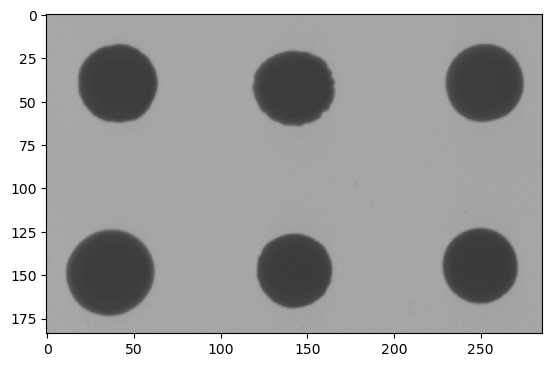

In [269]:
# test function with optional plot parameter
img  = load_image("yeast_colonies.jpg", plot=True)

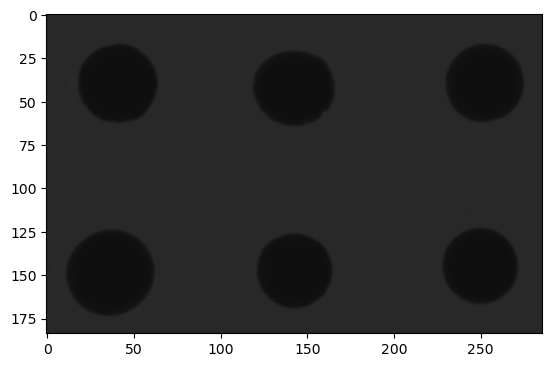

In [271]:
# the actual bit depth is 8-bits (the default), but let's see what happens if 
# we change it to a "wrong" value
img = load_image("yeast_colonies.jpg", plot=True, bitdepth=10)

thresholding image
defining regions
analyzing regions


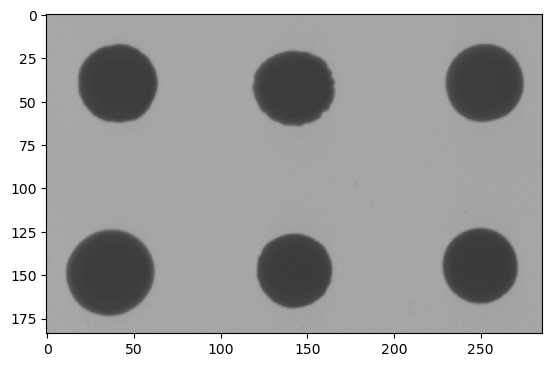

In [286]:
def segment_and_measure(fname, plot=False):
    img = load_image(fname, plot=plot)
    threshold_image()
    define_regions()
    analyze_regions()
    return img


img = segment_and_measure("yeast_colonies.jpg", plot=True)

#### threshold_image()

Now let's implement and test our threshold_image function.

In [296]:
def threshold_image(img, threshold, plot=False):
    """Threshold a grayscale image tt the given threshold value.
    Assumes dark objects against a light background.
    """
    binimg =  img < threshold
    if plot:
        plt.imshow(binimg, cmap="gray", vmin=0, vmax=1)
    return binimg
        

defining regions
analyzing regions


(array([[167, 166, 168, ..., 165, 164, 165],
        [167, 167, 166, ..., 166, 165, 164],
        [167, 167, 167, ..., 166, 164, 165],
        ...,
        [167, 168, 166, ..., 166, 165, 166],
        [167, 167, 168, ..., 165, 166, 165],
        [166, 166, 166, ..., 165, 166, 165]], dtype=uint8),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

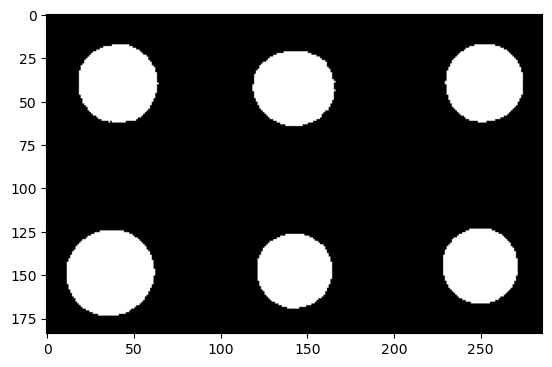

In [298]:
def segment_and_measure(fname, threshold):
    img = load_image(fname)
    binimg = threshold_image(img, threshold)
    define_regions()
    analyze_regions()

    return img, binimg

segment_and_measure("yeast_colonies.jpg", threshold=125)

In [118]:
def evaluate_grayscale_image(img, bitdepth=8):
    fig = plt.figure(layout='constrained', figsize=(10, 4))
    subfigs = fig.subfigures(nrows = 1, ncols = 2, wspace=0.07)

    # draw image on left
    axleft = subfigs[0].subplots(1,1)
    axleft.imshow(img, cmap="gray", vmin=0, vmax=2**bitdepth-1)
    subfigs[1].suptitle("Grayscale image")

    # draw histogram on right
    axright = subfigs[1].subplots(1,1)
    axright.hist(img.ravel())
    axright.set_xlabel("Intensity")
    axright.set_ylabel("Count")
    subfigs[1].suptitle("Histogram of pixel intensity\n(darker = smaller values)")




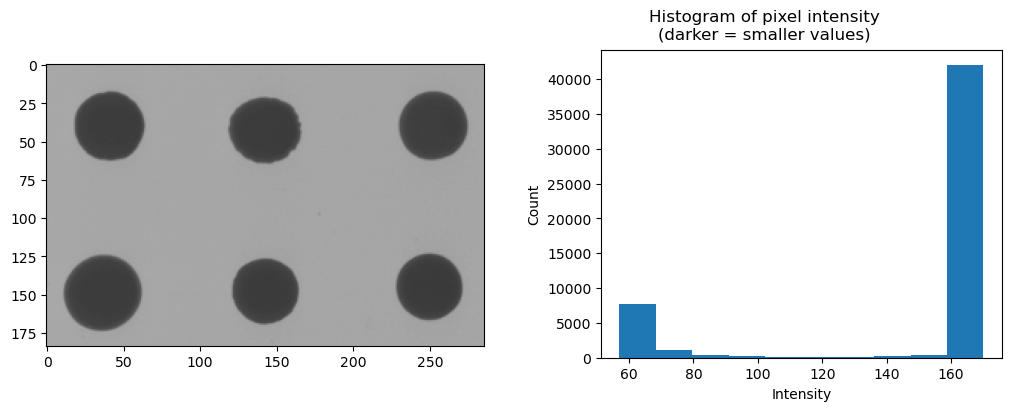

In [119]:
evaluate_grayscale_image(colonies)

In [99]:
def binarize_image(img, threshold):
    binimg = (colonies < threshold)
    plt.imshow(binimg, cmap="gray", norm=None, vmin=0, vmax=1)
    return binimg

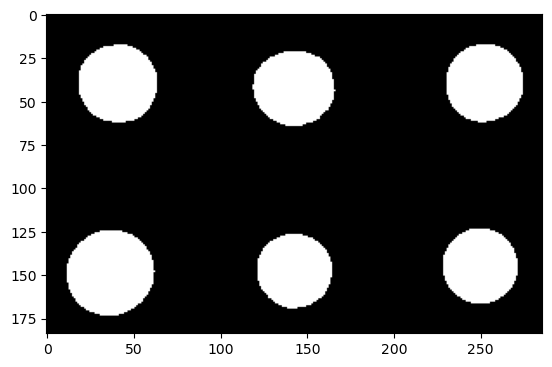

In [101]:
binimg = binarize_image(colonies, 120)

In [136]:
from skimage import measure

In [138]:
lblimg = measure.label(binimg)

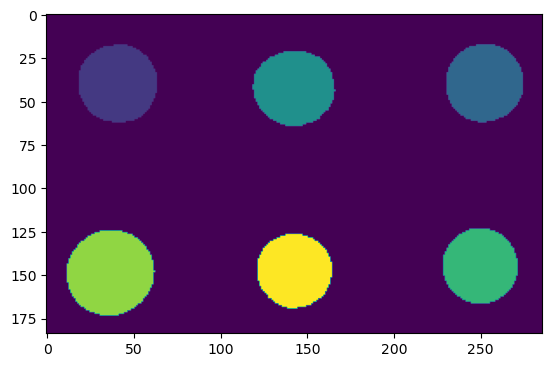

In [139]:
plt.imshow(lblimg)

In [141]:
import skimage

In [145]:
lbloverlay = skimage.color.label2rgb(lblimg, image=colonies)

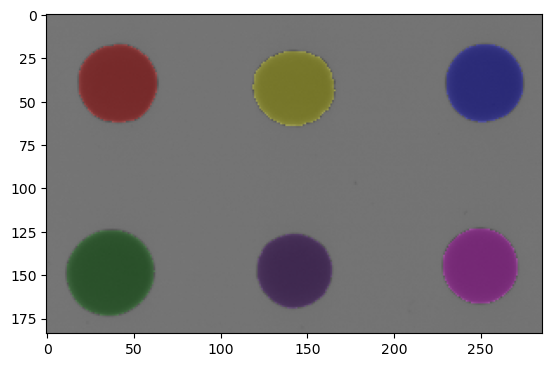

In [146]:
plt.imshow(lbloverlay)

In [147]:
centroids = []
for region in skimage.measure.regionprops(lblimg):
    centroids.append(region.centroid)


In [148]:
centroids

[(40.03507692307692, 40.944),
 (39.746683512318384, 252.38660770688566),
 (42.64125, 142.5325),
 (144.9742895805142, 249.94181326116373),
 (148.87640449438203, 36.579673135852914),
 (147.6922024623803, 142.82147742818057)]

In [149]:
centroids.sort()

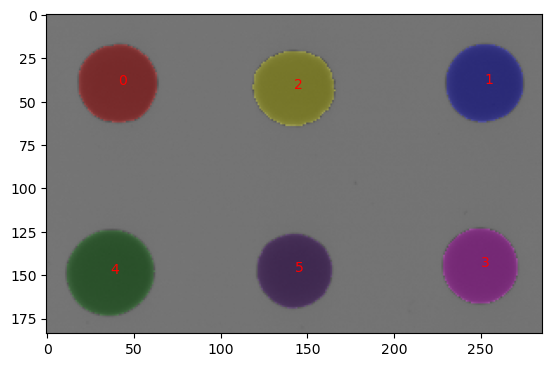

In [156]:
plt.imshow(lbloverlay)
for (i,region) in enumerate(skimage.measure.regionprops(lblimg)):
    centroid = region.centroid
    plt.text(centroid[1], centroid[0], str(i), color='red')


In [159]:
def label_and_measure(binimg, origimg):
    lblimg = skimage.measure.label(binimg)
    overlayimg = skimage.color.label2rgb(lblimg, image=origimg)
    regions = skimage.measure.regionprops(lblimg)
    plt.imshow(overlayimg)
    for (i, region) in enumerate(regions):
        plt.text(region.centroid[1], region.centroid[0], str(i), color='red')
    return lblimg, regions
    

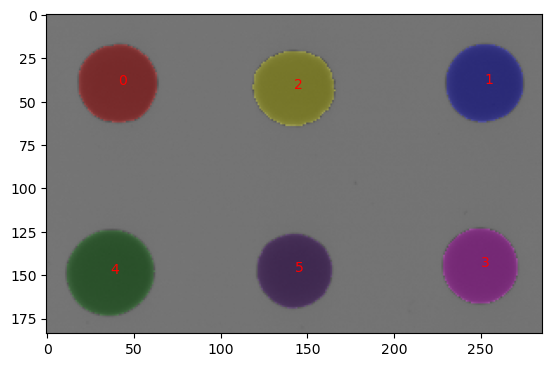

In [160]:
l,r = label_and_measure(binimg, colonies)

In [161]:
input("Enter threshold")

KeyboardInterrupt: Interrupted by user